In [2]:
import locale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read data from a csv file
df = pd.read_csv('/content/drive/MyDrive/Urban Air Quality and Health Impact Dataset.csv')

In [4]:
df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [5]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (1000, 46)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
datetime,object,0,0.000,0,15,1000,NaN,NaN,NaN,NaN,2024-09-07,2024-09-08,2024-09-09
datetimeEpoch,float64,0,0.000,0,895,1000,1725624158.923312,1727021426.427024,1726284302.824003,374583.376919,1725692400.0,1725778800.0,1725865200.0
tempmax,float64,0,0.000,0,951,1000,62.035432,107.7974,85.106961,9.524231,106.1,103.9,105.0
tempmin,float64,0,0.000,0,948,1000,49.108218,91.635546,68.641638,8.474102,91.0,87.0,83.9
temp,float64,0,0.000,0,970,1000,55.548415,99.851684,76.115967,8.72207,98.5,95.4,94.7
feelslikemax,float64,0,0.000,0,962,1000,62.206413,105.06017,85.195384,9.496951,104.0,100.5,99.9
feelslikemin,float64,0,0.000,0,951,1000,48.834041,89.369854,68.547548,8.365809,88.1,84.7,81.6
feelslike,float64,0,0.000,0,971,1000,57.748822,98.193984,76.323286,8.621361,95.9,92.3,90.6
dew,float64,0,0.000,0,972,1000,26.261814,76.648668,57.26712,9.161517,51.5,48.7,41.7
humidity,float64,0,0.000,0,978,1000,11.752135,92.459293,56.782281,16.708667,21.0,21.5,16.9


In [6]:
#We will exclude columns that have only 1 data type and/or a very large percentage of null data.

df.drop(["preciptype", "snow", "snowdepth", "Condition_Code", "Month", "Season", "stations"], axis=1, inplace=True)

In [7]:
# Check if there is still null data
df.isna().sum().sum()

0

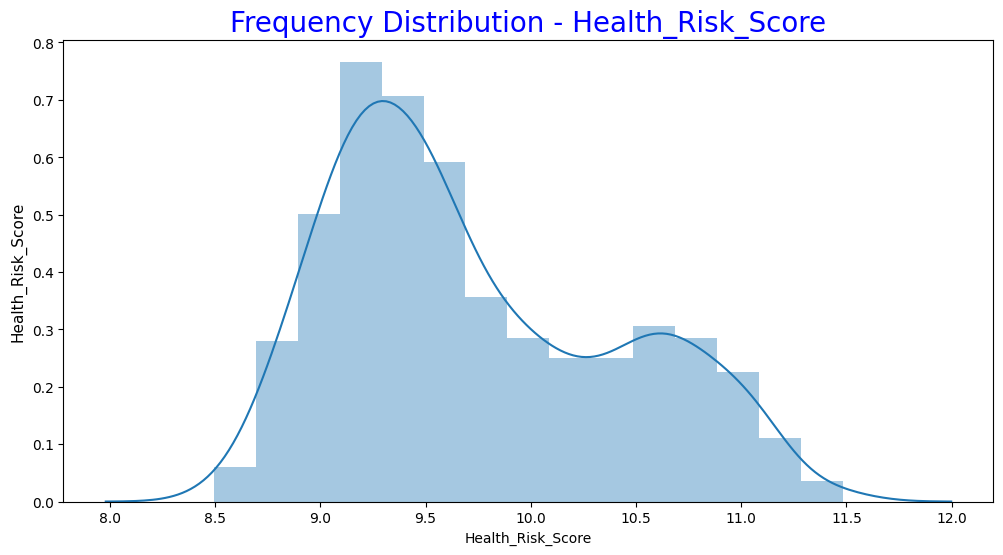

In [8]:
# Histogram - 'Health_Risk_Score'
ax = sns.distplot(df['Health_Risk_Score'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Health_Risk_Score', fontsize=20, color = "blue")
ax.set_ylabel('Health_Risk_Score', fontsize=11)
plt.show()

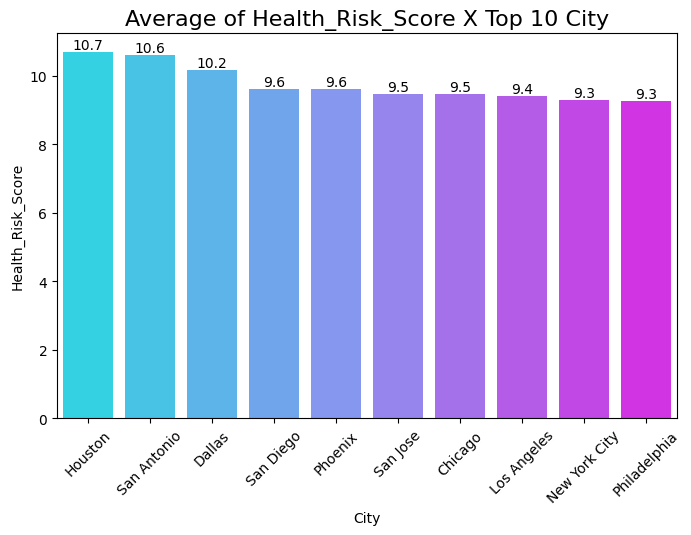

In [9]:
# Average of Health_Risk_Score X Top 10 City
df_cat = df.groupby('City')["Health_Risk_Score"].mean().reset_index()
df_cat = df_cat.sort_values(by='Health_Risk_Score', ascending=False).head(10)

# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = 'City', y = "Health_Risk_Score", data = df_cat, palette = 'cool')
plt.title("Average of Health_Risk_Score X Top 10 City", fontsize = 16)
plt.xticks(rotation=45, fontsize = 10)


# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points', rotation=0, fontsize=10)

plt.show()

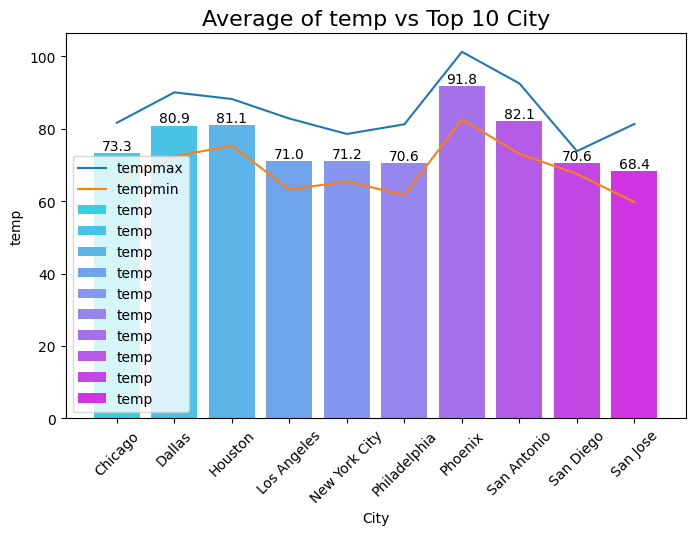

In [10]:
# Average of Health_Risk_Score X Top 10 City
df_cat = df.groupby('City')[["tempmin", "temp", "tempmax"]].mean().reset_index()
#df_cat = df_cat.sort_values(by='temp', ascending=False).head(10)

# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = 'City', y = "temp", data = df_cat, palette = 'cool', label = "temp")
ax = sns.lineplot(x = 'City', y = "tempmax", data = df_cat, label = "tempmax")
ax = sns.lineplot(x = 'City', y = "tempmin", data = df_cat, label = "tempmin")

plt.title("Average of temp vs Top 10 City", fontsize = 16)
plt.xticks(rotation=45, fontsize = 10)


# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points', rotation=0, fontsize=10)

plt.show()

In [11]:
# Convert non-numeric columns to numeric ones.

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le= LabelEncoder()

for col in df:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])

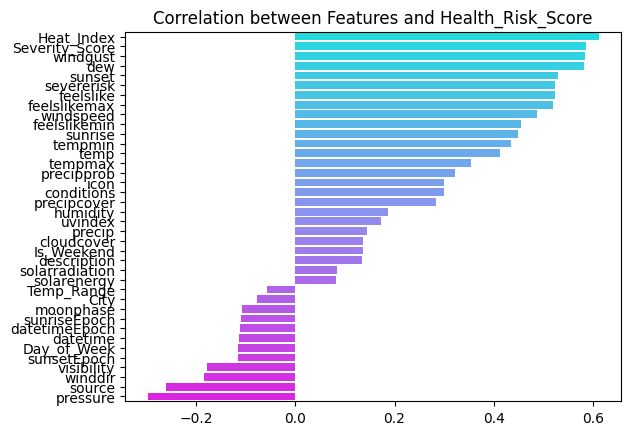

In [12]:
# Correlation with Health_Risk_Score

limite = -1

data = df.corr()["Health_Risk_Score"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limite:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels, palette = 'cool')
plt.title('Correlation between Features and Health_Risk_Score')
plt.show()

In [16]:
# Prepare data for modeling
X = df.drop(['Health_Risk_Score'], axis=1)
y = df['Health_Risk_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [13]:


# Define model
rf = RandomForestRegressor()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 0.014929790033909903
R-squared: 0.9624804175186689


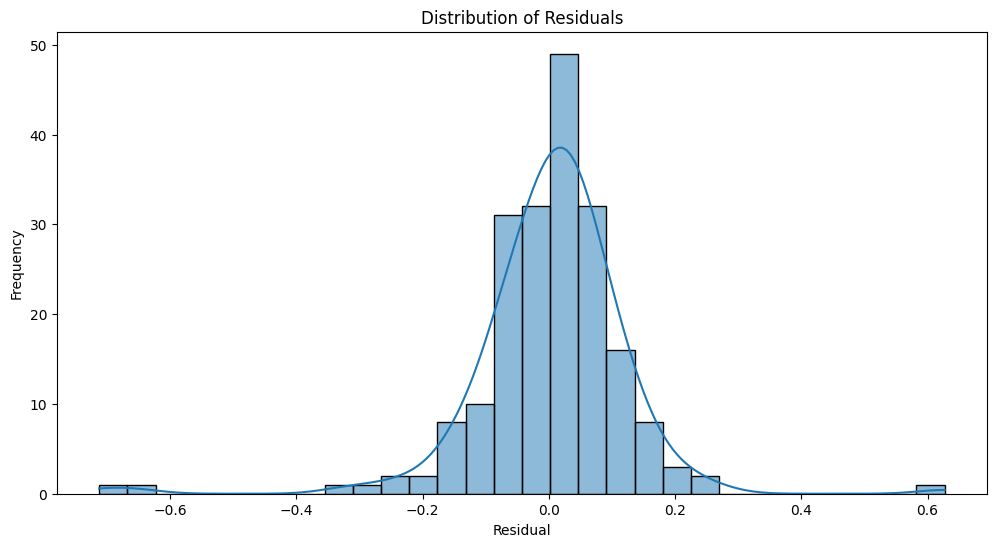

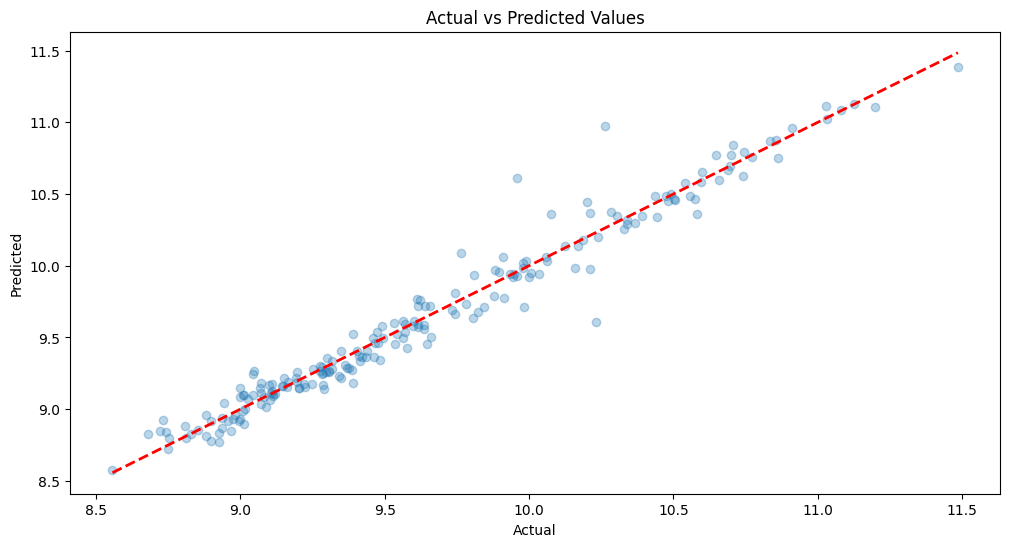

In [14]:
 # Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [21]:
# Perform cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')

print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared score: {cv_scores.mean()}")
print(f"Standard deviation of R-squared scores: {cv_scores.std()}")

Cross-validation R-squared scores: [0.98632779 0.95242888 0.97918575 0.98349708 0.96964825]
Mean R-squared score: 0.9742175514476175
Standard deviation of R-squared scores: 0.012272530703809993


In [22]:
import pickle

In [24]:
pickle.dump(best_rf,open('regmodel.pkl','wb'))

In [25]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [27]:
feature_columns = df.columns[:-1]

In [28]:
## Prediction
pickled_model.predict(scaler.transform(df[feature_columns].iloc[0].values.reshape(1, -1)))

array([8.82912263])